In [13]:
%load_ext blackcellmagic
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
from pathlib import Path
from sklearn import preprocessing


# code from 'aegis4048.github.io', modified for VI and yield

######################################## Data preparation #########################################

# data path
df_path = (
    Path.cwd()
    / "data"
    / "processed"
    / "Jun22_2020"
    / "Jun22_2020_df.csv"
)

df = pd.read_csv(df_path).iloc[:, 2:]
print(df.head().iloc[:,0:4])

The blackcellmagic extension is already loaded. To reload it, use:
  %reload_ext blackcellmagic
        yield  blue-blue-444  blue-green  blue-green-531
0  641.218827       0.013329   -0.419273       -0.445662
1  697.979880      -0.001042   -0.459447       -0.476955
2  709.891479       0.008540   -0.433216       -0.455423
3  674.191672       0.013697   -0.402593       -0.427173
4  680.430664       0.003195   -0.457388       -0.475037


In [50]:
# Train Test Split
train, test = train_test_split(df, test_size=0.2, shuffle=True)

X_train = train.iloc[:, 1:4].values
y_train = train['yield'].values

X_test = test.iloc[:, 1:4].values
y_test = test['yield'].values

# scale features
scaler = preprocessing.StandardScaler()

X_test_scaled = scaler.fit_transform(X_test)
X_train_scaled = scaler.fit_transform(X_train)

824.1496306416666 844.6471607804349
[ 1.94289029e-16 -9.62193288e-16 -1.07321559e-15] [-2.09976963e-16  3.89302117e-15 -5.23011586e-15]


In [57]:
################################################ Train #############################################

ols = linear_model.LinearRegression()
model = ols.fit(X_train_scaled, y_train)
model.score(X_train_scaled, y_train)


0.10092392404546358

In [58]:
############################################## Evaluate ############################################
y_pred = model.predict(X_test_scaled)
model.score(X_test_scaled, y_test)


-0.016905412202132375

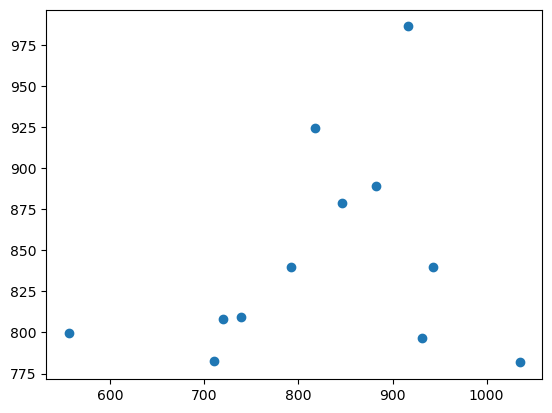

In [60]:
############################################## Plot ################################################
plt.scatter(y_test, y_pred)
plt.show()


In [ ]:

x = X_test_scaled[:,0]
y = X_test_scaled[:,1]
z = predicted

plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(x, y, predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('NDVI', fontsize=12)
    ax.set_ylabel('SAVI', fontsize=12)
    ax.set_zlabel('yield (CWT/A)', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

# ax1.text2D(0.2, 0.32, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
#            transform=ax1.transAxes, color='grey', alpha=0.5)
# ax2.text2D(0.3, 0.42, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
#            transform=ax2.transAxes, color='grey', alpha=0.5)
# ax3.text2D(0.85, 0.85, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
#            transform=ax3.transAxes, color='grey', alpha=0.5)

ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()

